In [24]:
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
n_samples = 1000

# Features
size = np.random.normal(2000, 500, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
age = np.random.randint(0, 50, n_samples)

# Target prices with linear relationship + noise

w1, w2, w3 = 100, 50000, -2000  # Coefficients
b = 100000                       # Intercept/bias

# noise = np.random.normal(0, 25000, n_samples)

prices = (100 * size + 50000 * bedrooms - 2000 * age + 100000 + 
          np.random.normal(0, 25000, n_samples))

# Create dataset
data = pd.DataFrame({
    'size_sqft': size,
    'bedrooms': bedrooms,
    'age_years': age,
    'price': prices
})

# Save to CSV
data.to_csv('/Users/olawalesalami/ML/aws-ml-bootcamp-2/aws-ml-bootcamp/Supervised Learning/house_prices.csv', index=False)
print(f"Generated {n_samples} house price samples")
print(data.head())

Generated 1000 house price samples
     size_sqft  bedrooms  age_years          price
0  2248.357077         4         42  482622.779930
1  1930.867849         1         18  304397.806645
2  2323.844269         3          4  457008.335401
3  2761.514928         5         10  605122.255898
4  1882.923313         3         11  429719.602090


In [39]:
# Create feature matrix X and target vector y
data = pd.read_csv('/Users/olawalesalami/ML/aws-ml-bootcamp-2/aws-ml-bootcamp/Supervised Learning/house_prices.csv')

# Features and target
X = data[['size_sqft', 'bedrooms', 'age_years']]
y = data['price']
print(X.head())
print(y.head())


     size_sqft  bedrooms  age_years
0  2248.357077         4         42
1  1930.867849         1         18
2  2323.844269         3          4
3  2761.514928         5         10
4  1882.923313         3         11
0    482622.779930
1    304397.806645
2    457008.335401
3    605122.255898
4    429719.602090
Name: price, dtype: float64


In [55]:
# Create a function to calculate the y-hat
def predict(X, weights, bias):
    return np.dot(X, weights) + bias

# Example usage
weights = np.array([w1, w2, w3])
bias = b
y_hat = predict(X, weights, bias)
#print(F" VALUES OF Y_HAT {y_hat}")
print(f" the data type for y-hat is {type(y_hat)}")
print(f" the data type for y is {type(y)}")
#print(f"the value of Y: {y}")
#print(weights)

 the data type for y-hat is <class 'numpy.ndarray'>
 the data type for y is <class 'pandas.core.series.Series'>


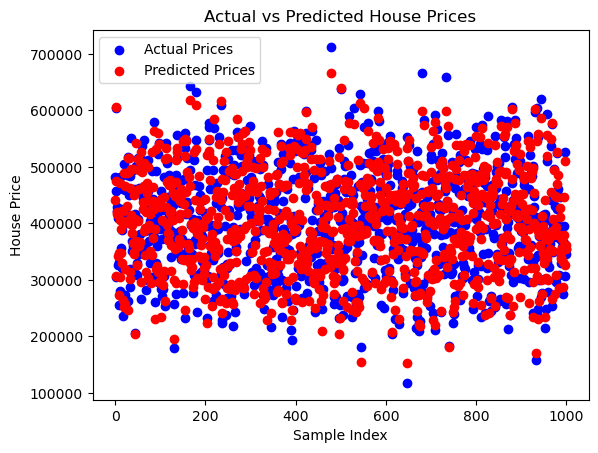

In [29]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y)), y, color='blue', label='Actual Prices')
plt.scatter(range(len(y_hat)), y_hat, color='red', label='Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('House Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()




In [ ]:
#create a function to calculate the cost function
def calculate_cost(y, y_hat):
    return np.mean((y - y_hat) ** 2) / 2






Cost: 292459109.00066847


In [42]:
# Example usage of cost function
cost = calculate_cost(y, y_hat)
print(f"Cost: {cost}")  # Target with noise

Cost: 292459109.00066847


In [ ]:
# calculate the gradient descent
def gradient_descent(X, y, weights, bias, learning_rate=0.00000001):
    n_samples = len(y) 
    y_hat = predict(X, weights, bias)
    
    # Calculate gradients
    #dw = (1/m) * Σ(x^(i) * (y-hat^(i) - y^(i)))
    #db = (1/m) * Σ(y-hat^(i) - y^(i))
    dw = (1/n_samples) * np.dot(X.T, (y_hat - y))
    db = (1/n_samples) * np.sum(y_hat - y)
    # Update weights and bias
    weights =weights - learning_rate * dw
    bias = bias - learning_rate * db
    return weights, bias







In [46]:

# Example usage of gradient descent function
weights, bias = gradient_descent(X, y, weights, bias)
print(f"Updated weights: {weights}, Updated bias: {bias}")


Updated weights: [   99.98980535 49999.99998394 -2000.00006696], Updated bias: 99999.99999350618
